In [1]:
import  pandas as pd
import numpy as np 
import matplotlib.pyplot as plt




%matplotlib inline

In [3]:
df = pd.read_csv("库存/一月库存数据.csv", encoding = "gbk")
df = df[df["年份"]==2019]
df = df[df["仓库类型"]=="分仓"]

In [43]:
df.shape

(7745578, 18)

In [4]:
df.shape

(7745578, 18)

In [2]:
sale = pd.read_csv("销售.csv",encoding = "gbk")

In [3]:
shop = pd.read_excel("全国店铺分档19.07.03.xlsx")

In [7]:
shop.columns

Index(['店铺简称', '店铺代码', '分公司', '经营定位'], dtype='object')

### 正价店/常规店

In [7]:
shop["经营定位"].value_counts()

正价店    243
常规店     94
折扣店     63
Name: 经营定位, dtype: int64

In [8]:
243/94

2.5851063829787235

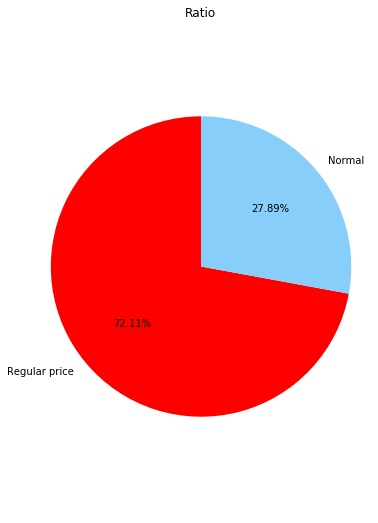

In [23]:
sizes = shop["经营定位"].value_counts().values[:2]
labels = ["Regular price","Normal"]
plt.figure(figsize=(6,9)) #调节图形大小

colors = ['red','lightskyblue']
explode = (0,0)
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
#patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
# x，y轴刻度设置一致，保证饼图为圆形
plt.axis('equal')
plt.title("Ratio")
plt.savefig("全国比例")
plt.show()



In [28]:
coms = shop.分公司.value_counts().index.values

In [33]:
mask = (shop["分公司"]==coms[0])
shop_ = shop[mask]
shop_["经营定位"].value_counts()[["正价店","常规店"]]

正价店    58
常规店    22
Name: 经营定位, dtype: int64

In [37]:
for i in range(coms.size): 
    mask = (shop["分公司"]==coms[i])
    shop_ = shop[mask]
    sizes = shop_["经营定位"].value_counts()[["正价店","常规店"]]
    print(coms[i])
    print(sizes)

华北
正价店    58
常规店    22
Name: 经营定位, dtype: int64
华中2
正价店    48
常规店    15
Name: 经营定位, dtype: int64
华南
正价店    39
常规店    22
Name: 经营定位, dtype: int64
华中1
正价店    38
常规店    10
Name: 经营定位, dtype: int64
西北
正价店    34
常规店    14
Name: 经营定位, dtype: int64
西南
正价店    26
常规店    11
Name: 经营定位, dtype: int64


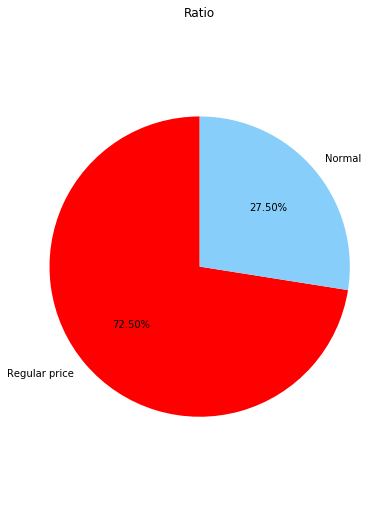

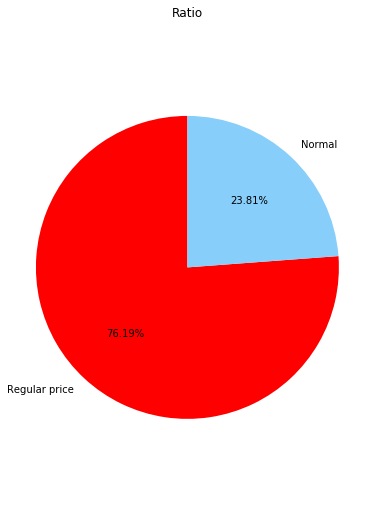

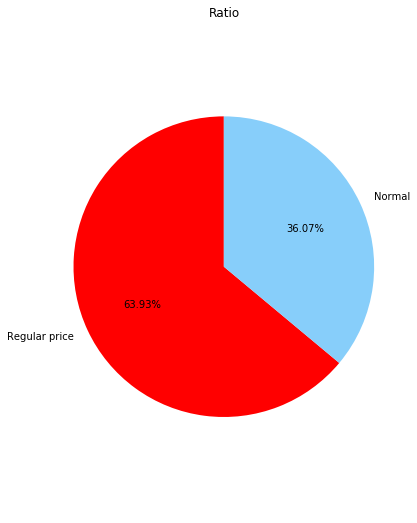

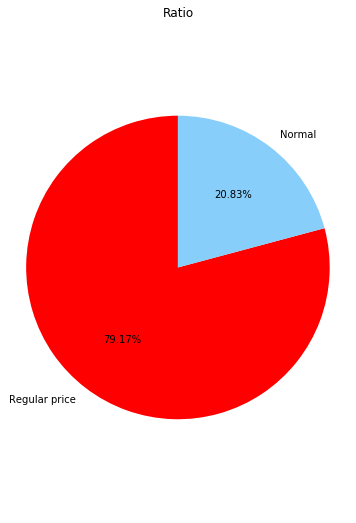

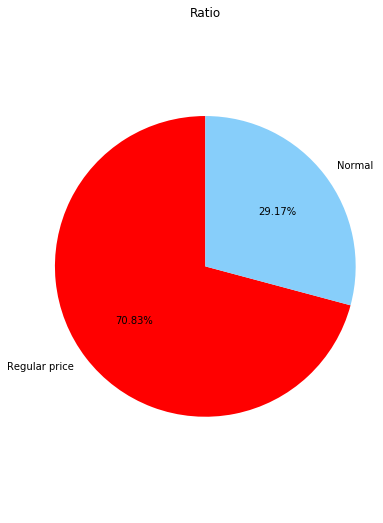

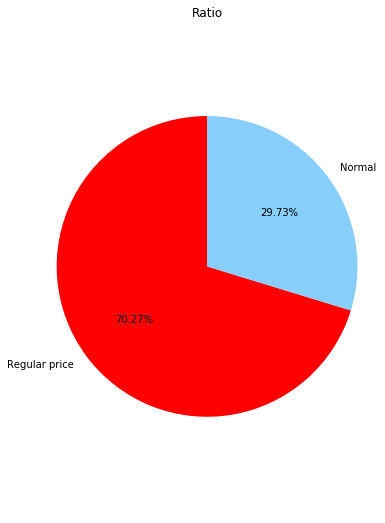

In [35]:
for i in range(coms.size): 
    mask = (shop["分公司"]==coms[i])
    shop_ = shop[mask]
    sizes = shop_["经营定位"].value_counts()[["正价店","常规店"]]
    labels = ["Regular price","Normal"]
    plt.figure(figsize=(6,9)) #调节图形大小
    
    colors = ['red','lightskyblue']
    explode = (0,0)
    patches,text1,text2 = plt.pie(sizes,
                          explode=explode,
                          labels=labels,
                          colors=colors,
                          autopct = '%3.2f%%', #数值保留固定小数位
                          shadow = False, #无阴影设置
                          startangle =90, #逆时针起始角度设置
                          pctdistance = 0.6) #数值距圆心半径倍数距离
    #patches饼图的返回值，texts1饼图外label的文本，texts2饼图内部的文本
    # x，y轴刻度设置一致，保证饼图为圆形
    plt.axis('equal')
    plt.title("Ratio")
    plt.savefig(coms[i]+"比例")
    plt.show()
    

# 计算优先调配正价店的后果
### 计算正价保护的名单（sku,分公司，开始保护的日期）

In [4]:
shop.drop(['店铺简称','分公司'],axis=1,inplace = True)

In [6]:
shop.shape

(400, 2)

In [7]:
df1 = pd.merge(sale,shop, left_on = '店铺编码',right_on = '店铺代码')

In [8]:
df1.drop("店铺代码",axis = 1 ,inplace = True)

In [9]:
df1["月份"] = pd.to_datetime(df1["时间"]).apply(lambda x : x.strftime("%m"))

In [10]:
df1["月份"]=df1["月份"].astype("int")

In [11]:
df1.head()

,时间,分公司,店铺编码,店铺名称,大类,中类,小类,商品编码,商品简称,尺码,年份,季节,波段,业绩金额,吊牌金额,销售数量,经营定位,月份
0,2019-03-05,华北分公司,01023,朔州北关一店,服装,其他外套,牛仔外套,M1XQ203680B0,牛仔外套,XXL,2019,春,第二波段,369.0,369.0,1,正价店,3
1,2019-03-05,华北分公司,01023,朔州北关一店,配件,服饰配件,眼镜,M1X8100946L0,眼镜,F,2018,春,第五周,39.9,39.9,1,正价店,3
2,2019-03-05,华北分公司,01023,朔州北关一店,服装,夹克,单夹克,M1XJ203618K3,茄克,3XL,2019,春,第二波段,369.0,369.0,1,正价店,3
3,2019-03-05,华北分公司,01023,朔州北关一店,纸袋,默认,默认,TYZD003W0,小纸袋,JM,2017,四季,NaN,0.0,0.0,1,正价店,3
4,2019-03-05,华北分公司,01023,朔州北关一店,纸袋,默认,默认,TYZD002W0,中纸袋,JM,2017,四季,NaN,0.0,0.0,2,正价店,3


In [12]:
coms = df1["分公司"].value_counts().index.values

In [13]:
coms

array(['华南分公司', '华北分公司', '华中1分公司', '华中2分公司', '西北分公司', '西南分公司'],
      dtype=object)

In [30]:
for i in range(7):
    for com in coms:
        df_ = df1[df1["月份"]==(i+1)]
        df_ = df_[df_["分公司"]==com]
        df_.to_csv(str(i+1)+"月"+com+".csv",index = False)

In [16]:
df.columns

Index(['时间', '分公司', '店铺编码', '店铺名称', '仓库类型', '大类', '中类', '小类', '商品编码', '商品简称',
       '尺码', '年份', '季节', '波段', '库存金额', '库存数量', '在途库存金额', '在途库存数量'],
      dtype='object')

In [6]:
df = pd.read_csv("库存/三月库存数据.csv", encoding = "gbk")
df = df[df["年份"]==2019]
df = df[df["仓库类型"]=="分仓"]
mask_ware=-(df["店铺名称"]=="损失仓")
df = df[mask_ware]
df["日"]=pd.to_datetime(df["时间"]).apply(lambda x:x.strftime("%d")).astype("int")
m = df[["分公司","商品编码","日"]][df["库存数量"]==0]

In [16]:
coms = df.分公司.value_counts().index.values

In [17]:
coms

array(['华中1分公司', '西北分公司', '华北分公司', '西南分公司', '华中2分公司', '华南分公司'],
      dtype=object)

In [7]:
m.to_csv("3月正价保护.csv",index = False)

## 保护

In [238]:
df_ = pd.DataFrame()
com = coms[0]
for i in [3,4,5]:
    df = pd.read_csv(str(i)+"月"+com+".csv")
    m = pd.read_csv(str(i)+"月正价保护.csv")
    df["销售日"] = pd.to_datetime(df["时间"]).apply(lambda x : x.strftime("%d")).astype("int")
    m_ = m[m["分公司"]==com]
    df__=df.groupby(by = ["时间","店铺编码","经营定位","分公司","商品编码","吊牌金额","年份","月份"],sort = False).sum().reset_index(["时间","分公司","经营定位","商品编码","店铺编码","吊牌金额"]).merge(m_,how = "inner",on = "商品编码",suffixes = ("_x","_y"))
    df_ = pd.concat([df_,df__])
df_["保护"] = (df_["销售日"]>=df_["日"])*df_["经营定位"].apply(lambda x:1 if x=="正价店"  else -1 if x=="常规店" else 0 )
df_=df_[-(df_["保护"]==0)]

In [190]:
df_.head()

,时间,店铺编码,经营定位,分公司_x,商品编码,吊牌金额,业绩金额,销售数量,销售日,分公司_y,日,保护
81,2019-03-06,01023,正价店,华北分公司,M1XJ203618K3,369.0,738.0,2,12,华北分公司,7,1
82,2019-03-06,01023,正价店,华北分公司,M1XJ203618K3,369.0,738.0,2,12,华北分公司,7,1
151,2019-03-06,01023,正价店,华北分公司,M1XJ203618K3,369.0,738.0,2,12,华北分公司,12,1
152,2019-03-06,01023,正价店,华北分公司,M1XJ203618K3,369.0,738.0,2,12,华北分公司,12,1
153,2019-03-06,01023,正价店,华北分公司,M1XJ203618K3,369.0,738.0,2,12,华北分公司,12,1


In [239]:
df_.drop(['时间','销售日','分公司_y','日'],axis = 1, inplace = True)
df_ = df_.groupby(by = ["店铺编码","经营定位","分公司_x","商品编码","吊牌金额","保护"],sort = False).sum().reset_index()

In [234]:
df_.head()

,店铺编码,经营定位,分公司_x,商品编码,吊牌金额,保护,业绩金额,销售数量
0,511068G,正价店,西南分公司,M2X1900050X0,398.0,1,62485.84,314
1,511068G,正价店,西南分公司,M2X1900050X0,199.0,1,236012.20,1186
2,511138J,正价店,西南分公司,M2X1900050X0,199.0,1,81789.00,411
3,503079J,常规店,西南分公司,M2X1900050X0,199.0,-1,15721.00,79
4,501134J,正价店,西南分公司,M2X1900050X0,199.0,1,52137.78,262


以下为数据的观察

In [117]:
df_[-(df_["吊牌金额"]==(df_["业绩金额"]/df_["销售数量"]))].经营定位.value_counts()#不按照吊牌价来卖的

正价店    11469
常规店     2568
Name: 经营定位, dtype: int64

In [121]:
df_[(df_["吊牌金额"]<(df_["业绩金额"]/df_["销售数量"]))].经营定位.value_counts()#有一些实际价格比吊牌价格还高的

正价店    2536
常规店     719
Name: 经营定位, dtype: int64

In [118]:
df_[(df_["吊牌金额"]==(df_["业绩金额"]/df_["销售数量"]))].经营定位.value_counts()#按照吊牌价来卖的

正价店    7863
常规店    2603
Name: 经营定位, dtype: int64

In [231]:
coms

['华南分公司', '华北分公司', '华中1分公司', '华中2分公司', '西北分公司', '西南分公司']

以上为数据的观察

In [240]:
#南方公司，向下取整
df_["销售单价"] = df_["业绩金额"]/df_["销售数量"]
df_["销量变动"]=0
df_["销额变动"]=0
df_["比例"]=0
dic=df_[df_["保护"]==-1].groupby(by = ["分公司_x","商品编码","保护"],sort = False).sum().reset_index()[["商品编码","销售数量"]].set_index("商品编码")
df_["保护数量"] = df_["商品编码"].apply(lambda x:int(dic.loc[x]) if x in dic.index.values else 0)

#计算出正价店某sku在该分公司的销售比例
def function(data):
    if(data["销售数量"].sum()==0):
        data["比例"]=1/data.shape[0]
    else:
        data["比例"] =data["销售数量"]/data["销售数量"].sum()
    return data
df_[df_["保护"]==1] = df_[df_["保护"]==1].groupby("商品编码").apply(function)

#计算出正价店的增加的销售数量
def func(data):
    data["销量变动"] = data["比例"]*data["保护数量"]*0.8
    data["销量变动"] = data["销量变动"].apply(math.floor)
    return data
df_[df_["保护"]==1] = func(df_[df_["保护"]==1])

#计算出常规店减少的销售数量
def func_(data):
    data["销量变动"] = -1*data["销售数量"]*0.8
    data["销量变动"] = data["销量变动"].apply(math.ceil)
    return data
df_[(df_["保护"]==-1)] = func_(df_[df_["保护"]==-1])

df_["销额变动"]= df_["销量变动"]*df_["销售单价"]#计算销售额变动

/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [228]:
#进行保护,北方公司向上取整

df_["销售单价"] = df_["业绩金额"]/df_["销售数量"]
df_["销量变动"]=0
df_["销额变动"]=0
df_["比例"]=0
dic=df_[df_["保护"]==-1].groupby(by = ["分公司_x","商品编码","保护"],sort = False).sum().reset_index()[["商品编码","销售数量"]].set_index("商品编码")
df_["保护数量"] = df_["商品编码"].apply(lambda x:int(dic.loc[x]) if x in dic.index.values else 0)

#计算出正价店某sku在该分公司的销售比例
def function(data):
    if(data["销售数量"].sum()==0):
        data["比例"]=1/data.shape[0]
    else:
        data["比例"] =data["销售数量"]/data["销售数量"].sum()
    return data
df_[df_["保护"]==1] = df_[df_["保护"]==1].groupby("商品编码").apply(function)

#计算出正价店的增加的销售数量
def func(data):
    data["销量变动"] = data["比例"]*data["保护数量"]*0.8
    data["销量变动"] = data["销量变动"].apply(math.ceil)
    return data
df_[df_["保护"]==1] = func(df_[df_["保护"]==1])

#计算出常规店减少的销售数量
def func_(data):
    data["销量变动"] = -1*data["销售数量"]*0.8
    data["销量变动"] = data["销量变动"].apply(math.ceil)
    return data
df_[(df_["保护"]==-1)] = func_(df_[df_["保护"]==-1])

df_["销额变动"]= df_["销量变动"]*df_["销售单价"]#计算销售额变动

/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/gang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

In [242]:
df_.to_csv(com+"保护结果.csv",index = False)

In [11]:
coms = ['华南分公司', '华北分公司', '华中1分公司', '华中2分公司', '西北分公司', '西南分公司']